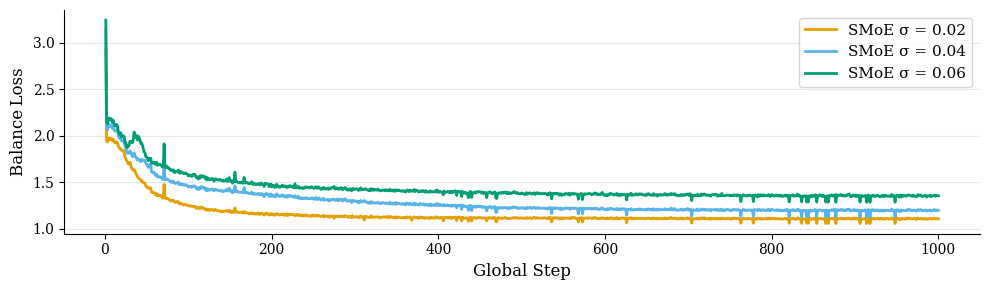

('./smoe_balance_loss_clip_sigma_labels_hgrid.png',
 './smoe_balance_loss_init_weights.pdf')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pathlib import Path
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 19
# ---------- Config ----------
csv_path = './wandb_export_2025-09-08T11_27_07.068+07_00.csv'
metric_suffix = 'train/balance_loss_clip'
okabe_ito = ['#E69F00', '#56B4E9', '#009E73', '#F0E442',
             '#0072B2', '#D55E00', '#CC79A7', '#000000']
# ----------------------------

assert Path(csv_path).exists(), f"{csv_path} not found"

# Detect variant columns quickly
header_cols = pd.read_csv(csv_path, nrows=0).columns
variant_pattern = re.compile(r'(.+?) - ' + re.escape(metric_suffix))
variants = sorted({m.group(1) for c in header_cols if (m := variant_pattern.match(c))})
usecols = ['train/global_step'] + [f'{v} - {metric_suffix}' for v in variants]

# Load needed columns only
df = pd.read_csv(csv_path, usecols=usecols).dropna(subset=['train/global_step'])

# Prettify labels (SMoE σ = 0.02)
def pretty(name):
    m = re.match(r'([\d.]+)', name)
    return fr'SMoE σ = {m.group(1) if m else name}'

labels = {v: pretty(v) for v in variants}

# Plot
plt.figure(figsize=(10, 3))
steps = df['train/global_step']

for i, variant in enumerate(variants):
    col = f'{variant} - {metric_suffix}'
    plt.plot(
        steps, df[col],
        label=labels[variant],
        color=okabe_ito[i % len(okabe_ito)],
        # marker='o',
        markersize=4,
        markeredgecolor='none',
        linewidth=2
    )

plt.xlabel('Global Step', fontsize=12)
plt.ylabel('Balance Loss', fontsize=12)
plt.legend(fontsize=11)

# Horizontal grid only
plt.grid(axis='y', alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Save outputs
png_path = './smoe_balance_loss_clip_sigma_labels_hgrid.png'
pdf_path = './smoe_balance_loss_init_weights.pdf'
plt.savefig(png_path, dpi=300)
plt.savefig(pdf_path)
plt.show()

png_path, pdf_path
